## Introduction

Welcome to the Cyclistic bike-share data analysis case study! In this case study, we will perform many real-world tasks of a junior data analyst. We are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share company in Chicago. Cyclistic is a successful company which sets itself aparts from its competition by making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike, and they have the potential to become a larger player in the global cyclistic company. The case study follows the structure of ask, prepare, process, analyse, share and act.

## Table of Contents

1. Ask
2. Prepare
3. Process
4. Analyze
5. Share
6. Act

## 1. Ask

Task: Analysing data from annual and casual memebers alongside historical bike trip data to identify trends and launch products/strategies that will help in growth opportunities for the company.

Key objectives:

*  A. Stakeholders
1. Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program.
2. Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.
3. Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

* B. Questions to be asked:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

* C. The business task: Given these facts, the business task is defined as searching for differences in the two identified kinds of users in order to make a focused marketing campaign to the “casual” users in order for them to change to the annual subscription, or resumed in a question:
>   What could motivate the “casual” users to change to an annual subscription based on their behavior?

## 2. Prepare

Necessary things to perform in this stage of analysis:

**1. Determine the credibility of the data:**

The data is public data from a bike sharing company. It starts from the year 2013 until 2021 (three months), there isn't much of a naming convention as the files are sometimes organized by quarter, or month, or the whole year and their names vary a lot.

**2. Sort and filter the data:**

The data needs to be sorted and filtered so, that it represents recent and necessary information.

In [1]:
library("tidyverse")          # Installing all the needed libraries for the analysis
library("ggplot2")
library("lubridate")
library("geosphere")
library("gridExtra") 
library("ggmap") 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


ℹ Google's Terms of Service: <https://mapsplatform.google.com>

ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.



In [2]:
# Load all the data to their respective variables

tripdata_2020_04 <- read.csv("../input/cyclistic/202004-divvy-tripdata/202004-divvy-tripdata.csv")
tripdata_2020_05 <- read.csv("../input/cyclistic/202005-divvy-tripdata/202005-divvy-tripdata.csv")
tripdata_2020_06 <- read.csv("../input/cyclistic/202006-divvy-tripdata/202006-divvy-tripdata.csv")
tripdata_2020_07 <- read.csv("../input/cyclistic/202007-divvy-tripdata/202007-divvy-tripdata.csv")
tripdata_2020_08 <- read.csv("../input/cyclistic/202008-divvy-tripdata/202008-divvy-tripdata.csv")
tripdata_2020_09 <- read.csv("../input/cyclistic/202009-divvy-tripdata/202009-divvy-tripdata.csv")
tripdata_2020_10 <- read.csv("../input/cyclistic/202010-divvy-tripdata/202010-divvy-tripdata.csv")
tripdata_2020_11 <- read.csv("../input/cyclistic/202011-divvy-tripdata/202011-divvy-tripdata.csv")
tripdata_2020_12 <- read.csv("../input/cyclistic/202012-divvy-tripdata/202012-divvy-tripdata.csv")
tripdata_2021_01 <- read.csv("../input/cyclistic/202101-divvy-tripdata/202101-divvy-tripdata.csv")
tripdata_2021_02 <- read.csv("../input/cyclistic/202102-divvy-tripdata/202102-divvy-tripdata.csv")
tripdata_2021_03 <- read.csv("../input/cyclistic/202103-divvy-tripdata/202103-divvy-tripdata.csv")

In [3]:
tripdata_withDoubles <- bind_rows(tripdata_2020_04,tripdata_2020_05,tripdata_2020_06,tripdata_2020_07,tripdata_2020_08,tripdata_2020_09,tripdata_2020_10,tripdata_2020_11)

tripdata_withDoubles <-  mutate(tripdata_withDoubles, start_station_id = as.character(start_station_id)
                   ,end_station_id = as.character(end_station_id)) 


tripdata_withChar <- bind_rows(tripdata_2020_12,tripdata_2021_01,tripdata_2021_02,tripdata_2021_03)

all_tripdata <- bind_rows(tripdata_withChar,tripdata_withDoubles)

# Joining all the data from 2020 and change the type of two columns (start_station_id,end_station_id) to match the 2021 data.

## 3. Process

In this step we tend to clean and transform the data while removing any error present to make data analysis process effective. Also we will make some changes to the data adding useful new columns based on calculations of already existing columns in order to facilitate our analysis and arrive at more insightful conclusions.

In [4]:
#Lets see that data:
print("####### GLIMPSE #######")
glimpse(all_tripdata)
print("####### SUMMARY #######")
summary(all_tripdata)

[1] "####### GLIMPSE #######"
Rows: 3,489,748
Columns: 13
$ ride_id            <chr> "70B6A9A437D4C30D", "158A465D4E74C54A", "5262016E0F…
$ rideable_type      <chr> "classic_bike", "electric_bike", "electric_bike", "…
$ started_at         <chr> "2020-12-27 12:44:29", "2020-12-18 17:37:15", "2020…
$ ended_at           <chr> "2020-12-27 12:55:06", "2020-12-18 17:44:19", "2020…
$ start_station_name <chr> "Aberdeen St & Jackson Blvd", "", "", "", "", "", "…
$ start_station_id   <chr> "13157", "", "", "", "", "", "", "", "", "", "", ""…
$ end_station_name   <chr> "Desplaines St & Kinzie St", "", "", "", "", "", ""…
$ end_station_id     <chr> "TA1306000003", "", "", "", "", "", "", "", "", "",…
$ start_lat          <dbl> 41.87773, 41.93000, 41.91000, 41.92000, 41.80000, 4…
$ start_lng          <dbl> -87.65479, -87.70000, -87.69000, -87.70000, -87.590…
$ end_lat            <dbl> 41.88872, 41.91000, 41.93000, 41.91000, 41.80000, 4…
$ end_lng            <dbl> -87.64445, -87.70000, -87.70000, -8

   ride_id          rideable_type       started_at          ended_at        
 Length:3489748     Length:3489748     Length:3489748     Length:3489748    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:3489748     Length:3489748     Length:3489748     Length:3489748    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [5]:
#Fist we drop all NA:

all_tripdata_clean <- drop_na(all_tripdata)

#Then lets create some new columns.

#First lets separate the dates into month, day, year and day of the week:

all_tripdata_clean$date <- as.Date(all_tripdata_clean$started_at) 
all_tripdata_clean$month <- format(as.Date(all_tripdata_clean$date), "%m")
all_tripdata_clean$day <- format(as.Date(all_tripdata_clean$date), "%d")
all_tripdata_clean$year <- format(as.Date(all_tripdata_clean$date), "%Y")
all_tripdata_clean$day_of_week <- format(as.Date(all_tripdata_clean$date), "%A")

#Then lets make some useful new columns with the duration of the ride, distance traveled, and speed:

#First the ride lenght in seconds:
all_tripdata_clean$ride_length <- difftime(all_tripdata_clean$ended_at,all_tripdata_clean$started_at)

#Then the ride distance traveled in km
all_tripdata_clean$ride_distance <- distGeo(matrix(c(all_tripdata_clean$start_lng, all_tripdata_clean$start_lat), ncol = 2), matrix(c(all_tripdata_clean$end_lng, all_tripdata_clean$end_lat), ncol = 2))
all_tripdata_clean$ride_distance <- all_tripdata_clean$ride_distance/1000

#At last the speed in Km/h
all_tripdata_clean$ride_speed = c(all_tripdata_clean$ride_distance)/as.numeric(c(all_tripdata_clean$ride_length), units="hours")

## 4. Prepare

The main objective of this process is to:

1. Format and organise the data
2. Identify relationships and trends.
3. Perform calculations
4. Aggregate the data so it’s accessible and useful

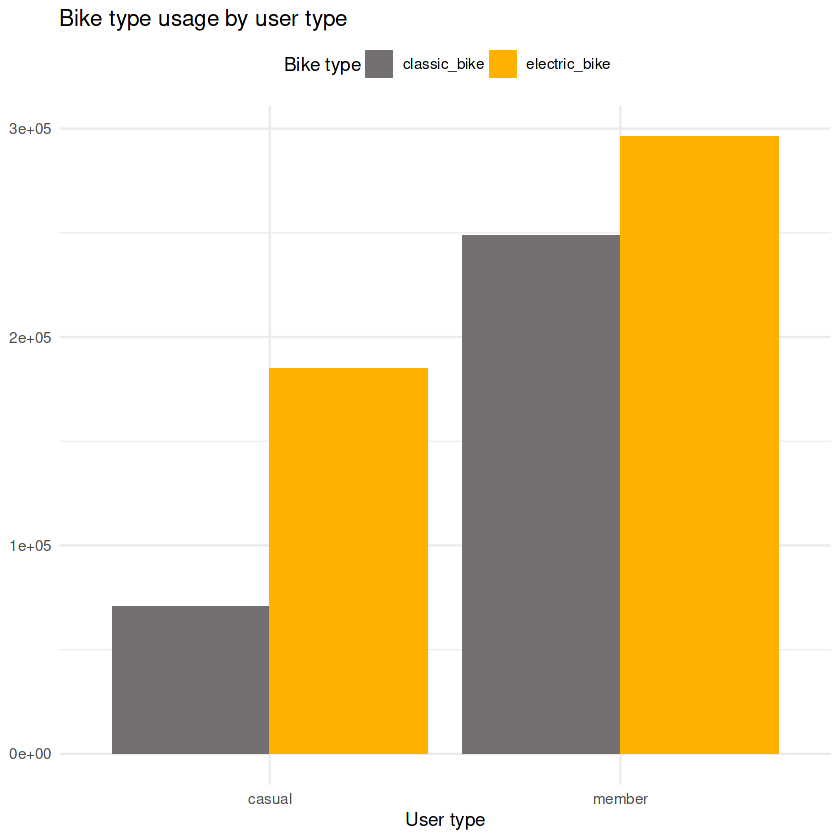

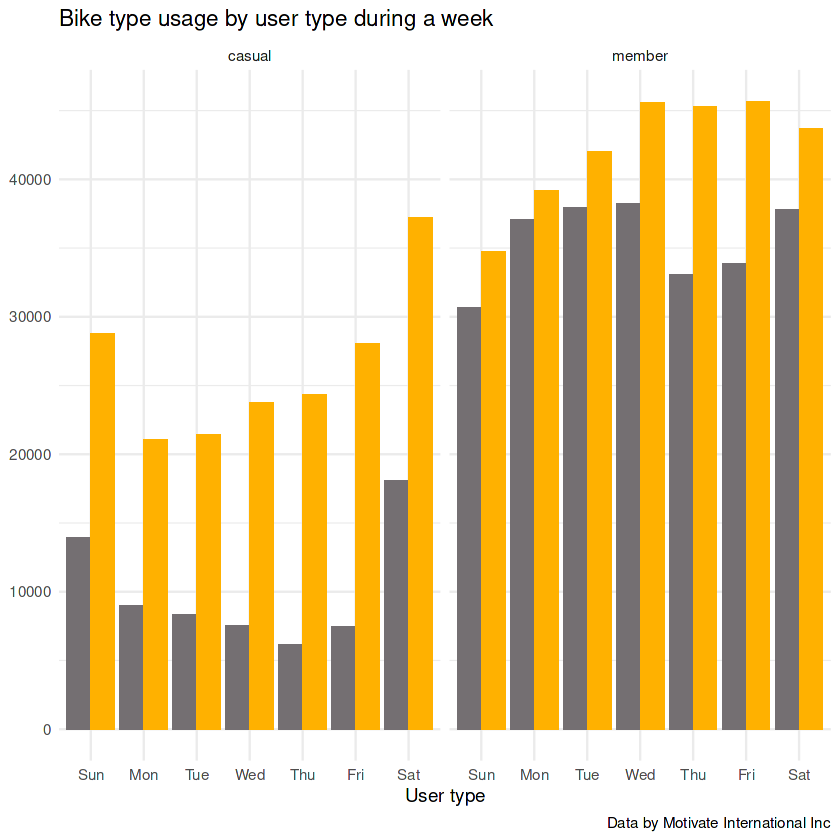

In [6]:
with_bike_type <- all_tripdata_clean %>% filter(rideable_type=="classic_bike" | rideable_type=="electric_bike")

#Then lets check the bike type usage by user type:

with_bike_type %>%
    group_by(member_casual,rideable_type) %>%
    summarise(totals=n(), .groups="drop")  %>%

ggplot()+
    geom_col(aes(x=member_casual,y=totals,fill=rideable_type), position = "dodge") + 
    labs(title = "Bike type usage by user type",x="User type",y=NULL, fill="Bike type") +
    scale_fill_manual(values = c("classic_bike" = "#746F72","electric_bike" = "#FFB100")) +
    theme_minimal() +
    theme(legend.position="top")

#And their usage by both user types during a week:

with_bike_type %>%
    mutate(weekday = wday(started_at, label = TRUE)) %>% 
    group_by(member_casual,rideable_type,weekday) %>%
    summarise(totals=n(), .groups="drop") %>%

ggplot(aes(x=weekday,y=totals, fill=rideable_type)) +
  geom_col(, position = "dodge") + 
  facet_wrap(~member_casual) +
  labs(title = "Bike type usage by user type during a week",x="User type",y=NULL,caption = "Data by Motivate International Inc") +
  scale_fill_manual(values = c("classic_bike" = "#746F72","electric_bike" = "#FFB100")) +
  theme_minimal() +
  theme(legend.position="none")

#### Findings:
1. Both types of users utilizes the 2 different type of bikes provided by the service but casual members tend to use electric bikes more as they indulge in more liesure activities.
2. Annual members are using the service more for commuting to thier work on weekdays.
3. Casual members are more active in weekends as they use the service for leisure-oriented activities. 

In [7]:
#First we create a table only for the most popular routes (>250 times)
coordinates_table <- all_tripdata_clean %>% 
filter(start_lng != end_lng & start_lat != end_lat) %>%
group_by(start_lng, start_lat, end_lng, end_lat, member_casual, rideable_type) %>%
summarise(total = n(),.groups="drop") %>%
filter(total > 250)

#Then we create two sub tables for each user type
casual <- coordinates_table %>% filter(member_casual == "casual")
member <- coordinates_table %>% filter(member_casual == "member")

#Lets store bounding box coordinates for ggmap:
chi_bb <- c(
  left = -87.700424,
  bottom = 41.790769,
  right = -87.554855,
  top = 41.990119
)

#Here we store the stamen map of Chicago
chicago_stamen <- get_stamenmap(
  bbox = chi_bb,
  zoom = 12,
  maptype = "toner"
)

ℹ Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Warning message:
“Removed 2 rows containing missing values (`geom_curve()`).”
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Warning message:
“Removed 7 rows containing missing values (`geom_curve()`).”


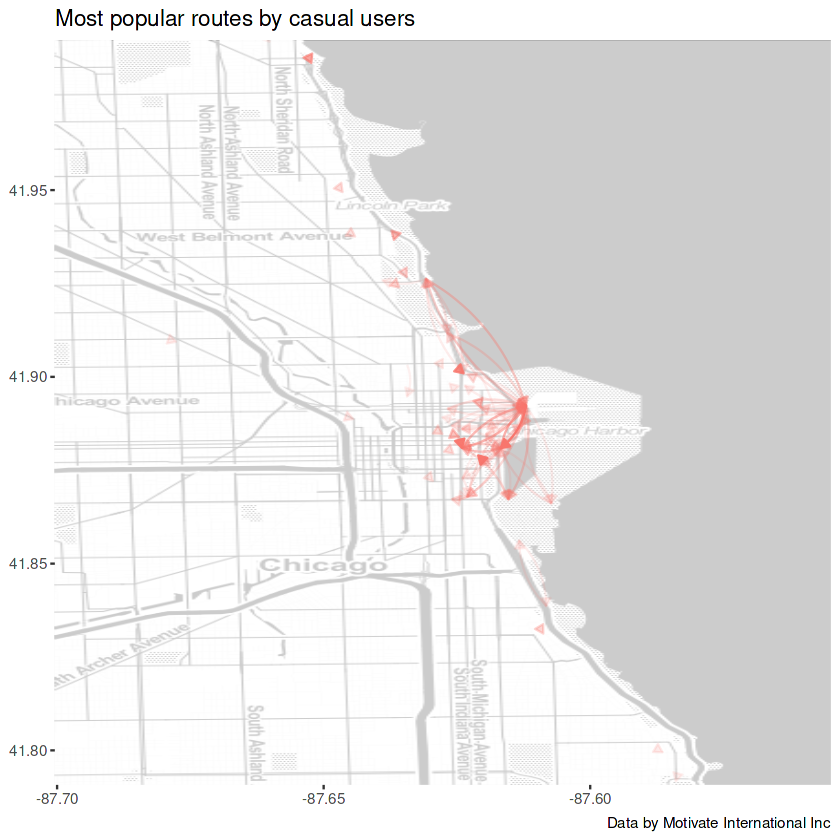

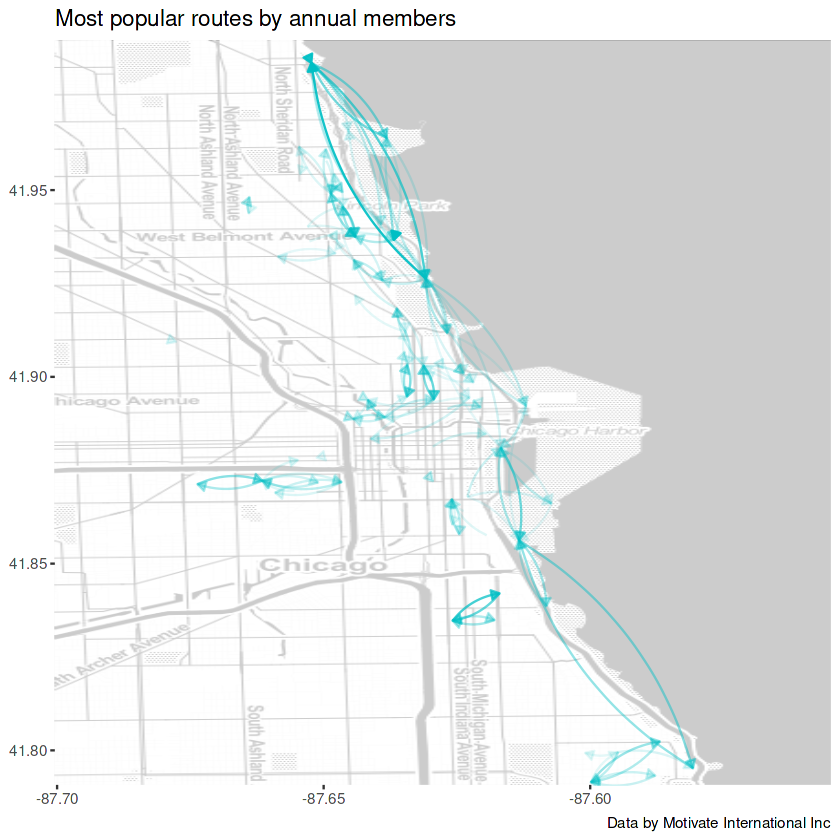

In [8]:
#Then we plot the data on the map

ggmap(chicago_stamen,darken = c(0.8, "white")) +
   geom_curve(casual, mapping = aes(x = start_lng, y = start_lat, xend = end_lng, yend = end_lat, alpha= total, color=rideable_type), size = 0.5, curvature = .2,arrow = arrow(length=unit(0.2,"cm"), ends="first", type = "closed")) +
    coord_cartesian() +
    labs(title = "Most popular routes by casual users",x=NULL,y=NULL, color="User type", caption = "Data by Motivate International Inc") +
    theme(legend.position="none")

ggmap(chicago_stamen,darken = c(0.8, "white")) +
    geom_curve(member, mapping = aes(x = start_lng, y = start_lat, xend = end_lng, yend = end_lat, alpha= total, color=rideable_type), size = 0.5, curvature = .2,arrow = arrow(length=unit(0.2,"cm"), ends="first", type = "closed")) +  
    coord_cartesian() +
    labs(title = "Most popular routes by annual members",x=NULL,y=NULL, caption = "Data by Motivate International Inc") +
    theme(legend.position="none")

## 5. Share

The main task of this part is:

1. Present the findings
2. Create an effective data visualization
3. Decide the perfect format/way to share
4. Easily accessible for everyone
5. Follow 5 seconds rule while creating visualization

This dataset is available to use and edit on Kaggle.com

#### Analysis:
1. We found that casual users are located around the center of the town using the coordinated data. All their trips are located around that area which makes sense given that they have a more relaxed leisure rides, on weekends probably also tourist or sightseeing related rides, that naturally focus more on the downtown area where most of the interest points are.
2. While the annual members usually live around/outside the downtown area of the city considering their long daily commute to their workplaces in the city.
3. Both these findings contrast each other.

## 6. Act

Cyclistic Bike-Share should consider my conclusions:

* Considerating the business task: ¿What could motivate the “casual” users to change to an annual subscription based on their behavior? and the insights we've learned from the available data,

  1.  The Casual users have leisure, and tourism rides mostly on weekends and using electric bikes.

  2. The Annual users have commute or pragmatic rides, during all week using both electric & classic bikes

* I would share this info, the data and my analysis to the marketing team, and I would suggest that in order to convert the casual to the annual users it would be interesting to focus the messages on the leisure aspect of the service, and maybe offer some kind of promotion related to weekends and/or electric bikes.